In [33]:
import matplotlib.pyplot as plt
import os
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from tqdm import tqdm
import torch
from model.res_net import BasicBlock_1, BasicBlock_2, Res_Net
import torch.nn as nn
import torch.optim as optim
import argparse
import numpy as np
import random

In [34]:
plt.style.use('ggplot')
def get_data(batch_size=64):
    # CIFAR10 training dataset.
    dataset_train = datasets.CIFAR10(
        root='data',
        train=True,
        download=True,
        transform=ToTensor(),
    )
    # CIFAR10 validation dataset.
    dataset_valid = datasets.CIFAR10(
        root='data',
        train=False,
        download=True,
        transform=ToTensor(),
    )
    # Create data loaders.
    train_loader = DataLoader(
        dataset_train, 
        batch_size=batch_size,
        shuffle=True
    )
    valid_loader = DataLoader(
        dataset_valid, 
        batch_size=batch_size,
        shuffle=False
    )
    return train_loader, valid_loader

In [35]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


Files already downloaded and verified
Files already downloaded and verified
torch.Size([32, 32, 3])


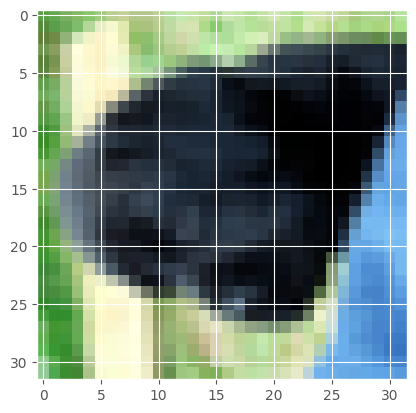

In [36]:
train_set, valid_set = get_data()

for i, data in enumerate(train_set):
    image, label = data
    image = image.to(device)
    print(image[1].T.shape)
    plt.imshow(image[1].T)
    plt.show()
    if i >= 0:
        break

In [37]:
def study(model, trainloader, optimizer, losses, device):
    model.train()
    train_loss = 0
    train_correct = 0
    # counter = 0
    print ("@@@ Start train model @@@")
    for i, data in tqdm(enumerate(trainloader), total=len(trainloader)):
        # counter += 1
        image, label = data
        image = image.to(device)
        label =label.to(device)
        # print(image.shape)
        # print(label.shape)
        optimizer.zero_grad()
        label_pre = model(image)
        # print(label_pre.shape)
        loss = losses(label_pre, label)
        train_loss += loss.item()
        # print(train_loss)
        _, preds = torch.max(label_pre.data, 1)
        train_correct += (preds == label).sum().item()
        loss.backward()
        optimizer.step()
        # print(preds)
    epoch_loss = train_loss / len(trainloader)
    epoch_acc = 100. * (train_correct / len(trainloader.dataset))
    return epoch_loss, epoch_acc


In [38]:
def validate(model, valloader, losses, device):
    val_loss = 0
    val_correct = 0

    for i, data in tqdm(enumerate(valloader), total=len(valloader)):

        image, label = data
        image = image.to(device)
        label =label.to(device)
        # print(image.shape)
        # print(label.shape)
        label_pre = model(image)
        # print(label_pre.shape)
        loss = losses(label_pre, label)
        val_loss += loss.item()
        # print(train_loss)
        _, preds = torch.max(label_pre.data, 1)
        val_correct += (preds == label).sum().item()
        # print(preds)
    epoch_loss = val_loss / len(valloader)
    epoch_acc = 100. * (val_correct / len(valloader.dataset))
    return epoch_loss, epoch_acc

In [39]:
batch_size = 256
train_set, valid_set = get_data(batch_size=batch_size)
learning_rate = 0.01
model = Res_Net(img_channels=3, num_layers=34, block_1 = BasicBlock_1, block_2 = BasicBlock_2, num_classes=10)
total_params = sum(p.numel() for p in model.parameters())
print(f"{total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"{total_trainable_params:,} training parameters.")

optimizer = optim.SGD(model.parameters(), lr=learning_rate)
# Loss function.
losses = nn.CrossEntropyLoss()

Files already downloaded and verified
Files already downloaded and verified
21,289,802 total parameters.
21,289,802 training parameters.


In [40]:
for i in range(3):
    train_acc, train_loss = study(model, train_set, optimizer, losses, device)
    val_acc, val_loss = validate(model, valid_set, losses, device)
    print(train_acc, train_loss)
    print(val_acc, val_loss)



@@@ Start train model @@@


100%|██████████| 40/40 [00:26<00:00,  1.52it/s]


1.6189108636914467 41.55
1.5013502836227417 46.33
@@@ Start train model @@@


100%|██████████| 40/40 [00:26<00:00,  1.53it/s]


1.2186925648426523 56.296
1.2615479469299316 53.959999999999994
@@@ Start train model @@@


 86%|████████▌ | 169/196 [12:20<01:58,  4.38s/it]


KeyboardInterrupt: 